In [109]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

In [162]:
data_path = "datasets/myntradataset/"

In [163]:
print(os.listdir(data_path))

['images', 'styles.csv']


In [90]:
# Importing labels dataset
df = pd.read_csv(data_path + 'styles.csv', error_bad_lines=False)

# Choosing label 'articleType' to be focused and formating the type
df_type = pd.DataFrame(df['articleType'].value_counts())
df_type['articleType'] = df_type['articleType'].astype(int)
df_type

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,articleType
Tshirts,7067
Shirts,3217
Casual Shoes,2845
Watches,2542
Sports Shoes,2036
...,...
Ipad,1
Mens Grooming Kit,1
Shoe Laces,1
Hair Accessory,1


In [91]:
# Choosing the top 15 classes
types = list(df_type.head(15).index)
types

['Tshirts',
 'Shirts',
 'Casual Shoes',
 'Watches',
 'Sports Shoes',
 'Kurtas',
 'Tops',
 'Handbags',
 'Heels',
 'Sunglasses',
 'Wallets',
 'Flip Flops',
 'Sandals',
 'Briefs',
 'Belts']

In [92]:
# Labeling the data
df_labels = df.loc[df['articleType'].isin(types)]
df_labels = df_labels[['id', 'articleType']]
df_labels = df_labels.reset_index(drop=True)
df_labels

,id,articleType
0,15970,Shirts
1,59263,Watches
2,53759,Tshirts
3,1855,Tshirts
4,30805,Shirts
...,...,...
29872,42234,Tops
29873,17036,Casual Shoes
29874,6461,Flip Flops
29875,18842,Tshirts


In [93]:
# Importing Images
img_data_list = []
rejected_image = []

for i in df_labels['id']:
    input_img=cv2.imread(data_path + '/images' + '/'+ str(i) + '.jpg')
    try:
        input_img_resize = cv2.resize(input_img, dsize=(64, 64))
        img_data_list.append(input_img_resize)
    except:
        rejected_image.append(i)
        print(f"Rejected Image: {i}.jpg")
        
# Remove rejected image from df_label
df_labels = df_labels[~df_labels['id'].isin(rejected_image)]
df_labels = df_labels.reset_index(drop = True)

# Converting articleType(string) to numerical data
labels = df_labels['articleType'].unique().tolist()
df_labels['label'] = df_labels['articleType'].apply(lambda x: labels.index(x))

Rejected Image: 39403.jpg
Rejected Image: 39410.jpg
Rejected Image: 39425.jpg


In [96]:
# Formatting and Normalization of the data
X = np.array(img_data_list)
X = X.reshape(-1, 64, 64, 3)
X = X.astype('float')
X = X/255

Y = np.array(df_labels['label'])
Y = Y.reshape(len(X),)

Shirts


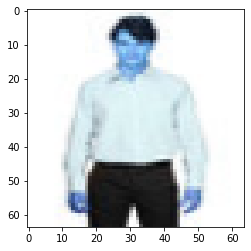

In [97]:
# Try to show the image
plt.imshow(X[29000])
print(labels[Y[29000]])

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [99]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26886, 64, 64, 3)
(26886,)
(2988, 64, 64, 3)
(2988,)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
from tensorflow import keras
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape = (64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 15, activation = 'softmax'))

In [156]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [147]:
from keras_visualizer import visualizer 
import visualkeras
from PIL import ImageFont

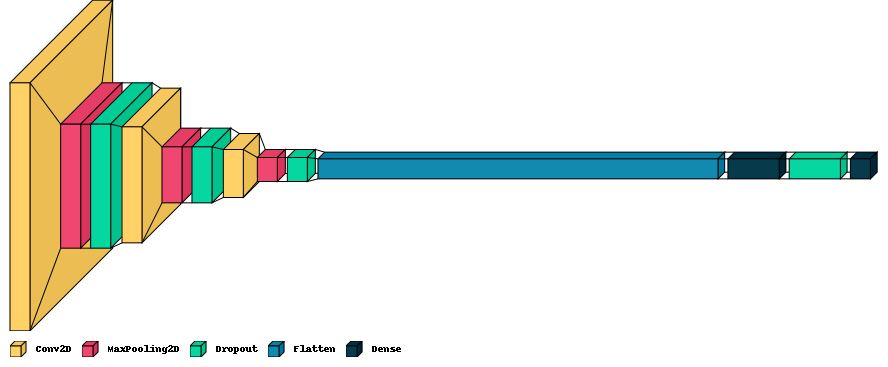

In [154]:
visualkeras.layered_view(model, legend=True)

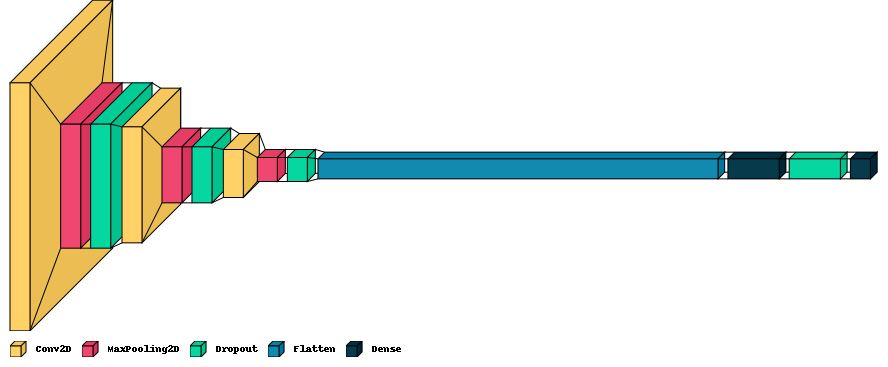

In [155]:
visualkeras.layered_view(model2, legend=True)

In [100]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [18]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/150
211/211 [==============================] - 3s 12ms/step - loss: 0.9791 - accuracy: 0.6623 - val_loss: 0.4690 - val_accuracy: 0.8330
Epoch 2/150
211/211 [==============================] - 2s 11ms/step - loss: 0.4462 - accuracy: 0.8377 - val_loss: 0.4378 - val_accuracy: 0.8357
Epoch 3/150
211/211 [==============================] - 2s 10ms/step - loss: 0.3701 - accuracy: 0.8645 - val_loss: 0.3321 - val_accuracy: 0.8802
Epoch 4/150
211/211 [==============================] - 2s 9ms/step - loss: 0.3190 - accuracy: 0.8822 - val_loss: 0.2955 - val_accuracy: 0.8916
Epoch 5/150
211/211 [==============================] - 2s 10ms/step - loss: 0.2851 - accuracy: 0.8936 - val_loss: 0.2845 - val_accuracy: 0.9006
Epoch 6/150
211/211 [==============================] - 2s 10ms/step - loss: 0.2674 - accuracy: 0.8995 - val_loss: 0.2600 - val_accuracy: 0.9056
Epoch 7/150
211/211 [==============================] - 2s 9ms/step - loss: 0.2429 - accuracy: 0.9083 - val_loss: 0.2574 - val_accuracy: 0

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

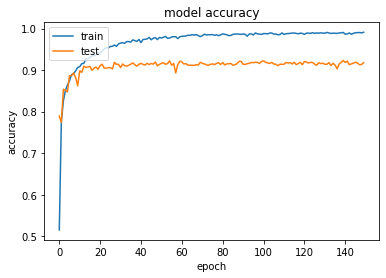

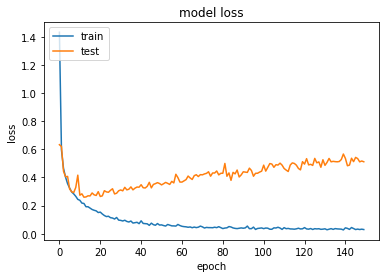

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [126]:
labels[np.argmax(model.predict(np.array(x_train[0]).reshape(1,64,64,3)))]

'Tshirts'

In [129]:
img_test = x_train[0]
img_test_label = y_train[0]

In [177]:
def predictFashionType(image_path, true_label = None):
    
    input_img=cv2.imread(image_path)
    plt.imshow(input_img)
    
    try:
        input_img_resize = cv2.resize(input_img, dsize=(64, 64))
    except:
        print(f"Invalid Image")
        
    image = np.array(input_img_resize)
    image = image.reshape(1,64,64,3)
    image = image.astype('float')
    image = image/255
    prediction = model.predict(image)
    label_pred = labels[np.argmax(prediction)]
    print(f"Predicted Label: {label_pred}")
    
    if true_label != None:     
        print(f"True Label: {labels[true_label]}")

In [ ]:
predictFashionType("1855.jpg", "Tshirts")

In [21]:
import json

In [23]:
# Get df containing each metric and the loss for each epoch
history_dict = history.history
manual_model_hist_df = pd.DataFrame.from_dict(history_dict)

In [28]:
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.9157


[0.5759953260421753, 0.9156626462936401]

In [29]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape = (64,64,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3, 3), input_shape = (64,64,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), input_shape = (64,64,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units = 15, activation = 'softmax'))

In [137]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)      

In [30]:
model2.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' , metrics =['accuracy'])

In [31]:
history = model2.fit(x_train, y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/150
211/211 [==============================] - 2s 11ms/step - loss: 1.4319 - accuracy: 0.5152 - val_loss: 0.6327 - val_accuracy: 0.7892
Epoch 2/150
211/211 [==============================] - 2s 11ms/step - loss: 0.5951 - accuracy: 0.7764 - val_loss: 0.6195 - val_accuracy: 0.7741
Epoch 3/150
211/211 [==============================] - 2s 10ms/step - loss: 0.4645 - accuracy: 0.8258 - val_loss: 0.4444 - val_accuracy: 0.8537
Epoch 4/150
211/211 [==============================] - 2s 9ms/step - loss: 0.4023 - accuracy: 0.8511 - val_loss: 0.4050 - val_accuracy: 0.8517
Epoch 5/150
211/211 [==============================] - 2s 9ms/step - loss: 0.3557 - accuracy: 0.8640 - val_loss: 0.4073 - val_accuracy: 0.8474
Epoch 6/150
211/211 [==============================] - 2s 10ms/step - loss: 0.3241 - accuracy: 0.8746 - val_loss: 0.3177 - val_accuracy: 0.8865
Epoch 7/150
211/211 [==============================] - 2s 10ms/step - loss: 0.2968 - accuracy: 0.8890 - val_loss: 0.2983 - val_accuracy: 0

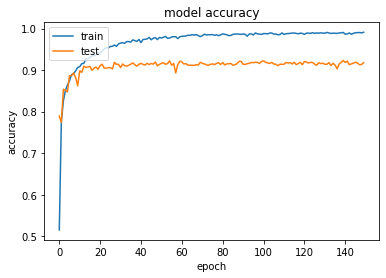

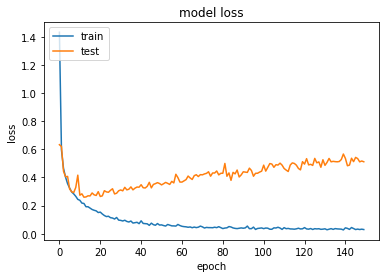

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
model2.evaluate(x_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.9177


[0.5113329291343689, 0.9176706671714783]

In [34]:
# Get df containing each metric and the loss for each epoch
history_dict = history.history
manual_model2_hist_df = pd.DataFrame.from_dict(history_dict)

In [35]:
manual_model2_hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.431889,0.515175,0.632677,0.789157
1,0.595073,0.776352,0.619456,0.774096
2,0.464546,0.825820,0.444393,0.853748
3,0.402289,0.851075,0.404972,0.851740
4,0.355695,0.863981,0.407274,0.847390
...,...,...,...,...
145,0.029590,0.989920,0.542386,0.919009
146,0.032746,0.990292,0.534094,0.916667
147,0.029716,0.990367,0.510888,0.912985
148,0.032250,0.989623,0.516807,0.913655


In [51]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='rmsprop' , metrics =['accuracy'])

In [52]:
history_rmsprop1 = model.fit(x_train, y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/150
211/211 [==============================] - 2s 12ms/step - loss: 0.0320 - accuracy: 0.9911 - val_loss: 0.7794 - val_accuracy: 0.9224
Epoch 2/150
211/211 [==============================] - 2s 11ms/step - loss: 0.0301 - accuracy: 0.9916 - val_loss: 0.7538 - val_accuracy: 0.9220
Epoch 3/150
211/211 [==============================] - 2s 11ms/step - loss: 0.0294 - accuracy: 0.9927 - val_loss: 0.8264 - val_accuracy: 0.9227
Epoch 4/150
211/211 [==============================] - 2s 10ms/step - loss: 0.0313 - accuracy: 0.9923 - val_loss: 0.8303 - val_accuracy: 0.9210
Epoch 5/150
211/211 [==============================] - 2s 10ms/step - loss: 0.0285 - accuracy: 0.9922 - val_loss: 0.8093 - val_accuracy: 0.9247
Epoch 6/150
211/211 [==============================] - 2s 11ms/step - loss: 0.0312 - accuracy: 0.9915 - val_loss: 0.8217 - val_accuracy: 0.9284
Epoch 7/150
211/211 [==============================] - 2s 10ms/step - loss: 0.0281 - accuracy: 0.9929 - val_loss: 0.7964 - val_accuracy:

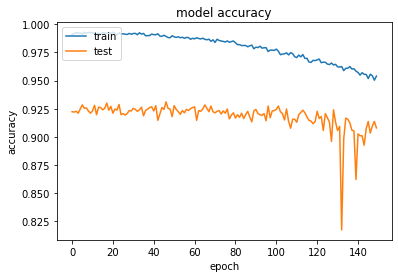

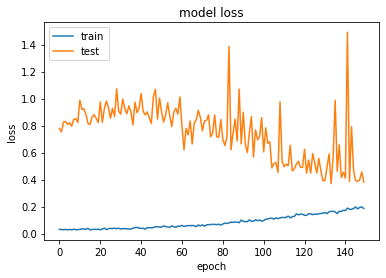

In [54]:
plt.plot(history_rmsprop1.history['accuracy'])
plt.plot(history_rmsprop1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_rmsprop1.history['loss'])
plt.plot(history_rmsprop1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.9080


[0.38195687532424927, 0.9079651832580566]

In [56]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape = (64,64,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.5))

model3.add(Conv2D(64, (3, 3), input_shape = (64,64,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), input_shape = (64,64,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())
model3.add(Dense(units = 512, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 15, activation = 'softmax'))

model3.compile(loss ='sparse_categorical_crossentropy', optimizer='rmsprop' , metrics =['accuracy'])

In [ ]:
model2.compile(loss ='sparse_categorical_crossentropy', optimizer='rmsprop' , metrics =['accuracy'])

In [102]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)      

Epoch 1/150
211/211 [==============================] - 2s 11ms/step - loss: 1.3344 - accuracy: 0.5746 - val_loss: 1.1610 - val_accuracy: 0.5706
Epoch 2/150
211/211 [==============================] - 2s 11ms/step - loss: 0.5136 - accuracy: 0.8113 - val_loss: 0.7386 - val_accuracy: 0.7721
Epoch 3/150
211/211 [==============================] - 2s 11ms/step - loss: 0.3949 - accuracy: 0.8546 - val_loss: 0.3711 - val_accuracy: 0.8655
Epoch 4/150
211/211 [==============================] - 2s 11ms/step - loss: 0.3447 - accuracy: 0.8727 - val_loss: 0.3350 - val_accuracy: 0.8788
Epoch 5/150
211/211 [==============================] - 2s 10ms/step - loss: 0.3069 - accuracy: 0.8867 - val_loss: 0.4204 - val_accuracy: 0.8487
Epoch 6/150
211/211 [==============================] - 2s 10ms/step - loss: 0.2731 - accuracy: 0.8982 - val_loss: 0.3112 - val_accuracy: 0.8795
Epoch 7/150
211/211 [==============================] - 2s 10ms/step - loss: 0.2544 - accuracy: 0.9056 - val_loss: 0.2885 - val_accuracy:

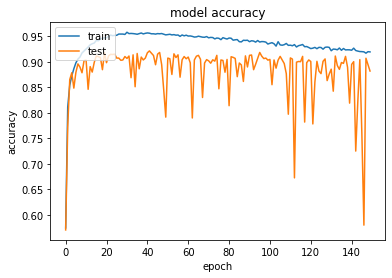

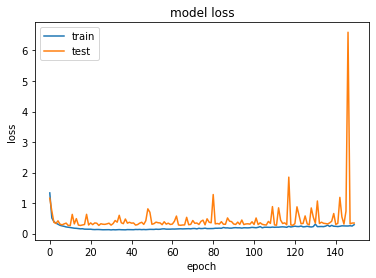

In [57]:
history_rmsprop = model3.fit(x_train, y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (x_test, y_test))

plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_rmsprop.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
model3.evaluate(x_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8822


[0.34742286801338196, 0.8821954727172852]

In [ ]:
def classify(img_path):
    img = image.load_img(img_path, target_size=(64,64))
    img_array = image.img_to_array(img)

    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)

    model = tf.keras.applications.resnet50.ResNet50()
    prediction = model.predict(img_preprocessed)

    print(decode_predictions(prediction, top=3)[0])

classify("./datasets/myntradataset/images/1549.jpg")

In [61]:
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(64, 64, 3),
    include_top=False)

In [62]:
base_model.trainable = False

In [63]:
# Create inputs with correct shape
inputs = keras.Input(shape=(64, 64, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(15, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model_vgg16 = keras.Model(inputs, outputs)

In [64]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 15)                7695      
Total params: 14,722,383
Trainable params: 7,695
Non-trainable params: 14,714,688
_________________________________________________________________


In [65]:
model_vgg16.compile(loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [66]:
history_vgg16 = model_vgg16.fit(x_train, y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/150
211/211 [==============================] - 5s 24ms/step - loss: 1.3651 - accuracy: 0.5930 - val_loss: 0.8592 - val_accuracy: 0.7252
Epoch 2/150
211/211 [==============================] - 5s 23ms/step - loss: 0.7148 - accuracy: 0.7847 - val_loss: 0.6304 - val_accuracy: 0.7888
Epoch 3/150
211/211 [==============================] - 5s 23ms/step - loss: 0.5767 - accuracy: 0.8184 - val_loss: 0.5587 - val_accuracy: 0.8159
Epoch 4/150
211/211 [==============================] - 5s 22ms/step - loss: 0.5149 - accuracy: 0.8334 - val_loss: 0.5013 - val_accuracy: 0.8293
Epoch 5/150
211/211 [==============================] - 5s 21ms/step - loss: 0.4776 - accuracy: 0.8432 - val_loss: 0.4709 - val_accuracy: 0.8437
Epoch 6/150
211/211 [==============================] - 4s 21ms/step - loss: 0.4520 - accuracy: 0.8497 - val_loss: 0.4527 - val_accuracy: 0.8477
Epoch 7/150
211/211 [==============================] - 5s 22ms/step - loss: 0.4331 - accuracy: 0.8551 - val_loss: 0.4359 - val_accuracy:

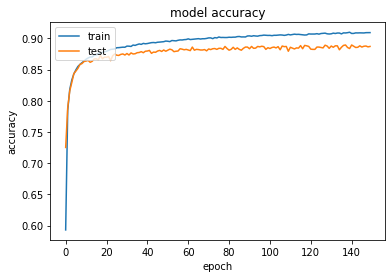

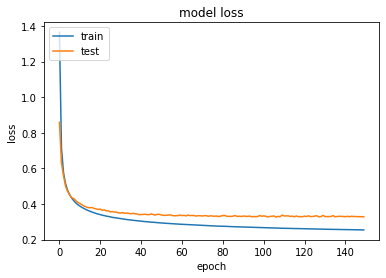

In [67]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
model_vgg16.evaluate(x_test, y_test)

94/94 [==============================] - 1s 9ms/step - loss: 0.3285 - accuracy: 0.8872


[0.32846799492836, 0.8872155547142029]

In [78]:
model_vgg16adam = keras.Model(inputs, outputs)

In [79]:
model_vgg16adam.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [80]:
history_vgg16adam = model_vgg16adam.fit(x_train, y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/150
211/211 [==============================] - 5s 26ms/step - loss: 0.2668 - accuracy: 0.9074 - val_loss: 0.3406 - val_accuracy: 0.8815
Epoch 2/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2658 - accuracy: 0.9077 - val_loss: 0.3401 - val_accuracy: 0.8835
Epoch 3/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2658 - accuracy: 0.9073 - val_loss: 0.3375 - val_accuracy: 0.8852
Epoch 4/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2647 - accuracy: 0.9081 - val_loss: 0.3388 - val_accuracy: 0.8845
Epoch 5/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2651 - accuracy: 0.9062 - val_loss: 0.3375 - val_accuracy: 0.8832
Epoch 6/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2638 - accuracy: 0.9071 - val_loss: 0.3359 - val_accuracy: 0.8842
Epoch 7/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2633 - accuracy: 0.9068 - val_loss: 0.3376 - val_accuracy:

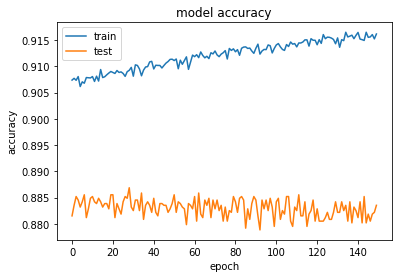

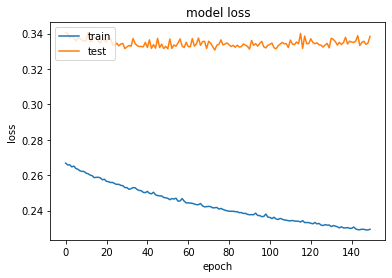

In [81]:
plt.plot(history_vgg16adam.history['accuracy'])
plt.plot(history_vgg16adam.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_vgg16adam.history['loss'])
plt.plot(history_vgg16adam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
model_vgg16adam.evaluate(x_test, y_test)

94/94 [==============================] - 1s 9ms/step - loss: 0.3384 - accuracy: 0.8835


[0.3384397029876709, 0.8835341334342957]

In [83]:
model_vgg16rmsprop = keras.Model(inputs, outputs)

In [84]:
model_vgg16rmsprop.compile(optimizer='rmsprop', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [85]:
history_vgg16rmsprop = model_vgg16rmsprop.fit(x_train, y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/150
211/211 [==============================] - 6s 26ms/step - loss: 0.2292 - accuracy: 0.9162 - val_loss: 0.3436 - val_accuracy: 0.8768
Epoch 2/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2287 - accuracy: 0.9166 - val_loss: 0.3399 - val_accuracy: 0.8792
Epoch 3/150
211/211 [==============================] - 5s 26ms/step - loss: 0.2288 - accuracy: 0.9165 - val_loss: 0.3375 - val_accuracy: 0.8819
Epoch 4/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2288 - accuracy: 0.9148 - val_loss: 0.3492 - val_accuracy: 0.8755
Epoch 5/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2290 - accuracy: 0.9171 - val_loss: 0.3410 - val_accuracy: 0.8795
Epoch 6/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2292 - accuracy: 0.9168 - val_loss: 0.3373 - val_accuracy: 0.8822
Epoch 7/150
211/211 [==============================] - 5s 25ms/step - loss: 0.2292 - accuracy: 0.9146 - val_loss: 0.3459 - val_accuracy:

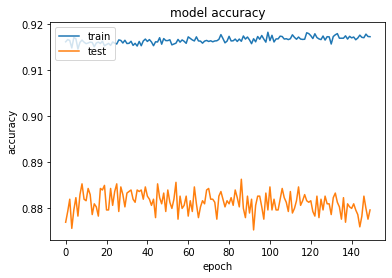

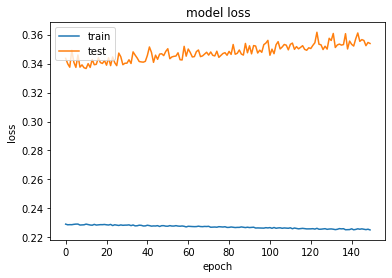

In [86]:
plt.plot(history_vgg16rmsprop.history['accuracy'])
plt.plot(history_vgg16rmsprop.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_vgg16rmsprop.history['loss'])
plt.plot(history_vgg16rmsprop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
model_vgg16rmsprop.evaluate(x_test, y_test)

94/94 [==============================] - 1s 9ms/step - loss: 0.3539 - accuracy: 0.8795


[0.3538549840450287, 0.8795180916786194]

In [70]:
base_model = keras.applications.VGG19(
    weights='imagenet',
    input_shape=(64, 64, 3),
    include_top=False)

In [71]:
base_model.trainable = False

In [72]:
# Create inputs with correct shape
inputs = keras.Input(shape=(64, 64, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(15, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model_vgg19 = keras.Model(inputs, outputs)

In [73]:
model_vgg19.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
vgg19 (Model)                (None, 2, 2, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)                7695      
Total params: 20,032,079
Trainable params: 7,695
Non-trainable params: 20,024,384
_________________________________________________________________


In [74]:
model_vgg19.compile(loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [75]:
history_vgg19 = model_vgg19.fit(x_train, y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/150
211/211 [==============================] - 6s 26ms/step - loss: 1.3906 - accuracy: 0.5866 - val_loss: 0.8818 - val_accuracy: 0.7426
Epoch 2/150
211/211 [==============================] - 5s 25ms/step - loss: 0.7434 - accuracy: 0.7769 - val_loss: 0.6541 - val_accuracy: 0.7888
Epoch 3/150
211/211 [==============================] - 5s 25ms/step - loss: 0.6069 - accuracy: 0.8090 - val_loss: 0.5711 - val_accuracy: 0.8042
Epoch 4/150
211/211 [==============================] - 5s 25ms/step - loss: 0.5430 - accuracy: 0.8248 - val_loss: 0.5321 - val_accuracy: 0.8186
Epoch 5/150
211/211 [==============================] - 5s 25ms/step - loss: 0.5050 - accuracy: 0.8345 - val_loss: 0.4949 - val_accuracy: 0.8347
Epoch 6/150
211/211 [==============================] - 5s 26ms/step - loss: 0.4784 - accuracy: 0.8417 - val_loss: 0.4746 - val_accuracy: 0.8377
Epoch 7/150
211/211 [==============================] - 5s 25ms/step - loss: 0.4588 - accuracy: 0.8479 - val_loss: 0.4578 - val_accuracy:

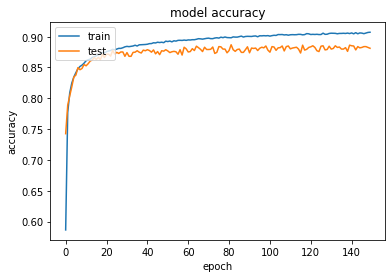

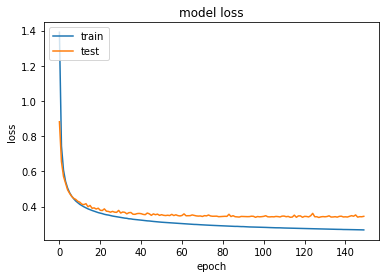

In [76]:
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
model_vgg19.evaluate(x_test, y_test)

94/94 [==============================] - 1s 9ms/step - loss: 0.3441 - accuracy: 0.8812


[0.34409040212631226, 0.8811914324760437]